## Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels import graphics
from statsmodels.graphics.api import abline_plot
from scipy import stats

## Extra functions

In [2]:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

## Importing dataset

In [3]:
df = pd.read_excel("mod.xlsx")

### Checking the dataset

In [4]:
df.head() 

,Nome do produtor,esp_cult,A_total (Hc),land_r_i,land_rent/hc(R$),N_viveiros,Area_lamina(m²),Area_lamina(hc),Tanque_berç,qtd_berç,...,main_income,compl_income,eletric_m(R$),diar,qtd_diar_ciclo,diar_pric(R$),numb_work,numb_famwork,salario,salário_fam
0,Arnon,Camarão,5.0,20000,20000,5,10000,1.0000,1,2,...,0,1,3000,1,3,60,2,0,1200,0
1,Cristina,Camarão,2.0,20000,20000,5,10000,1.0000,0,0,...,0,1,3500,1,1,50,2,0,1200,0
2,Clecio,Tilápia,0.5,252,20000,1,126,0.0126,0,0,...,0,1,600,0,0,0,0,3,0,1000
3,Maurilio luiz martins,Tilápia,1.0,180,20000,1,90,0.0090,0,0,...,0,1,170,0,0,0,0,0,0,0
4,Eduardo Cordeiro da Silva,Tilápia,1.0,14400,20000,6,7200,0.7200,1,1,...,1,0,2200,1,2,70,4,0,1200,0


In [5]:
df.describe()

,A_total (Hc),land_r_i,land_rent/hc(R$),N_viveiros,Area_lamina(m²),Area_lamina(hc),Tanque_berç,qtd_berç,densi_stock(an/ar),stock_densi(m2),...,main_income,compl_income,eletric_m(R$),diar,qtd_diar_ciclo,diar_pric(R$),numb_work,numb_famwork,salario,salário_fam
count,12.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,4.583333,14292.769231,20000.0,5.461538,7146.384615,0.714638,0.384615,0.615385,55.000000,59.692308,...,0.307692,0.692308,2397.692308,0.615385,1.538462,45.384615,1.461538,1.384615,646.153846,307.692308
std,4.235099,21179.557401,0.0,3.755338,10589.778700,1.058978,0.506370,0.869718,49.838071,46.047773,...,0.480384,0.480384,2329.750179,0.506370,1.560736,32.045641,1.450022,2.218801,622.649426,487.273945
min,0.500000,180.000000,20000.0,1.000000,90.000000,0.009000,0.000000,0.000000,6.000000,6.000000,...,0.000000,0.000000,170.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.150000,1960.000000,20000.0,3.000000,980.000000,0.098000,0.000000,0.000000,10.000000,20.000000,...,0.000000,0.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.500000,8600.000000,20000.0,5.000000,4300.000000,0.430000,0.000000,0.000000,40.000000,44.000000,...,0.000000,1.000000,1300.000000,1.000000,1.000000,60.000000,1.000000,0.000000,1200.000000,0.000000
75%,7.250000,18000.000000,20000.0,7.000000,9000.000000,0.900000,1.000000,1.000000,100.000000,100.000000,...,1.000000,1.000000,3500.000000,1.000000,3.000000,70.000000,3.000000,3.000000,1200.000000,800.000000
max,14.000000,80000.000000,20000.0,14.000000,40000.000000,4.000000,1.000000,2.000000,150.000000,150.000000,...,1.000000,1.000000,7000.000000,1.000000,4.000000,70.000000,4.000000,5.000000,1200.000000,1200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nome do produtor    13 non-null     object 
 1   esp_cult            13 non-null     object 
 2   A_total (Hc)        12 non-null     float64
 3   land_r_i            13 non-null     int64  
 4   land_rent/hc(R$)    13 non-null     int64  
 5   N_viveiros          13 non-null     int64  
 6   Area_lamina(m²)     13 non-null     int64  
 7   Area_lamina(hc)     13 non-null     float64
 8   Tanque_berç         13 non-null     int64  
 9   qtd_berç            13 non-null     int64  
 10  densi_stock(an/ar)  13 non-null     int64  
 11  stock_area          13 non-null     object 
 12  stock_densi(m2)     13 non-null     int64  
 13  Prod_ano(Kg)        13 non-null     float64
 14  ciclo_ano           13 non-null     float64
 15  aerador             13 non-null     int64  
 16  Controle_t

In [7]:
df.dtypes

Nome do produtor       object
esp_cult               object
A_total (Hc)          float64
land_r_i                int64
land_rent/hc(R$)        int64
N_viveiros              int64
Area_lamina(m²)         int64
Area_lamina(hc)       float64
Tanque_berç             int64
qtd_berç                int64
densi_stock(an/ar)      int64
stock_area             object
stock_densi(m2)         int64
Prod_ano(Kg)          float64
ciclo_ano             float64
aerador                 int64
Controle_termico        int64
solo_treatpc            int64
probiotico              int64
qtd_prob_cicl           int64
Probiotico_água         int64
Probiotico_ração        int64
Probiótico_solo         int64
comer_resf              int64
comer_cong              int64
comer_natu              int64
peso_prod(g)            int64
water_source           object
qutd_mil_juv_an       float64
Kg/raç/ano            float64
Kg/raç/mês            float64
ton/raç/mês           float64
saca_rac_mes          float64
sac_rac_an

Nota-se que algumas variáveis ainda estão num formato de caracteres e outras com nomes que poderiam ser mudados para facilitar uma possível modelagem. Faremos um pré-processamento inicial para que a variável categórica se torne numérica, renomearemos algumas colunas e dividiremos o dataset em dois, um contendo os produtores de tilápia e outro com os produtores de camarão.

## Preprocessing

In [8]:
#Renaming columns
df.rename(columns={'Nome do produtor': 'produtor',
                   'A_total (Hc)':'A_tot',
                   
                   'preço_saco_ (R$)':'preco_sac',
                  'Prod_ano(Kg)':'prod_an',
                  'Area_lamina(hc)':'arealamhc'}, inplace=True)
#Checking if the names were changed
for col in df.columns:
    print(col)

produtor
esp_cult
A_tot
land_r_i
land_rent/hc(R$)
N_viveiros
Area_lamina(m²)
arealamhc
Tanque_berç
qtd_berç
densi_stock(an/ar)
stock_area
stock_densi(m2)
prod_an
ciclo_ano
aerador
Controle_termico
solo_treatpc
probiotico
qtd_prob_cicl
Probiotico_água
Probiotico_ração
Probiótico_solo
comer_resf
comer_cong
comer_natu
peso_prod(g)
water_source
qutd_mil_juv_an
Kg/raç/ano
Kg/raç/mês
ton/raç/mês
saca_rac_mes
sac_rac_an
preco_sac
asist_tec
n_tecn
trein_trab
yers_cult
educ
prec_kil(R$)
prec_mijuv
prec_prob
consult_pri(R$)
main_income
compl_income
eletric_m(R$)
diar
qtd_diar_ciclo
diar_pric(R$)
numb_work
numb_famwork
salario
salário_fam


In [9]:
# Checking which are the values in the variable educ
df['educ'].value_counts(normalize=True)

ensino medio completo      0.307692
superior completo          0.230769
fundamental incompleto     0.230769
superior incompleto        0.153846
ensino medio incompleto    0.076923
Name: educ, dtype: float64

It's notable that there are 5 different vallues for this variable and its counting the education level of the producers, so let's codify this variable attributing numerical values for each of these values.

In [10]:
# Changing the values of the educational level of the producers for numerical values. 
# Higher values attributed to the producers with more years of formal education
df['educ'] = df['educ'].replace({'ensino medio completo':'2',
                                 'superior completo':'4',
                                 'fundamental incompleto':'0',
                                 'superior incompleto':'3',
                                 'ensino medio incompleto':'1'})
df['educ'] = df['educ'].astype(float)

In [11]:
df['esp_cult'] = df['esp_cult'].replace({'Camarão':'White Shrimp',
                                 'Tilápia':'Tilapia'})

In [12]:
df.dtypes

produtor               object
esp_cult               object
A_tot                 float64
land_r_i                int64
land_rent/hc(R$)        int64
N_viveiros              int64
Area_lamina(m²)         int64
arealamhc             float64
Tanque_berç             int64
qtd_berç                int64
densi_stock(an/ar)      int64
stock_area             object
stock_densi(m2)         int64
prod_an               float64
ciclo_ano             float64
aerador                 int64
Controle_termico        int64
solo_treatpc            int64
probiotico              int64
qtd_prob_cicl           int64
Probiotico_água         int64
Probiotico_ração        int64
Probiótico_solo         int64
comer_resf              int64
comer_cong              int64
comer_natu              int64
peso_prod(g)            int64
water_source           object
qutd_mil_juv_an       float64
Kg/raç/ano            float64
Kg/raç/mês            float64
ton/raç/mês           float64
saca_rac_mes          float64
sac_rac_an

## Creating economic variables


In [13]:
# Creating new economic variables to make deeper analysis based in the data we have 
df['productivity'] = df['prod_an']/df['arealamhc']
df['gross income']=df['prec_kil(R$)']*df['prod_an']
df['EOC'] = (df['qtd_diar_ciclo']*df['diar_pric(R$)']*df['ciclo_ano'])+(df['numb_work']*df['salario']*12)+(df['sac_rac_an']*df['preco_sac'])+(df['eletric_m(R$)']*12)
df['TOC'] = df['EOC']+(df['qutd_mil_juv_an']*df['prec_mijuv'])+(df['consult_pri(R$)']*12)+(df['numb_famwork']*df['salário_fam']*12)
df['LOC'] = df['land_rent/hc(R$)']*df['arealamhc']
df['TC'] = df['TOC']+df['LOC']
df['GM'] = df['gross income']-df['EOC']
df['NM'] = df['gross income']-df['TOC']
df['Profit'] = df['gross income']-df['TC']

In [14]:
# Creating a new df without the variables which presented common values from all producers to better visualization of correlations
df2 = df.drop(columns=['land_rent/hc(R$)', 'aerador', 'comer_natu'])

<AxesSubplot:title={'center':'Heatmap of the producers variables correlation'}>

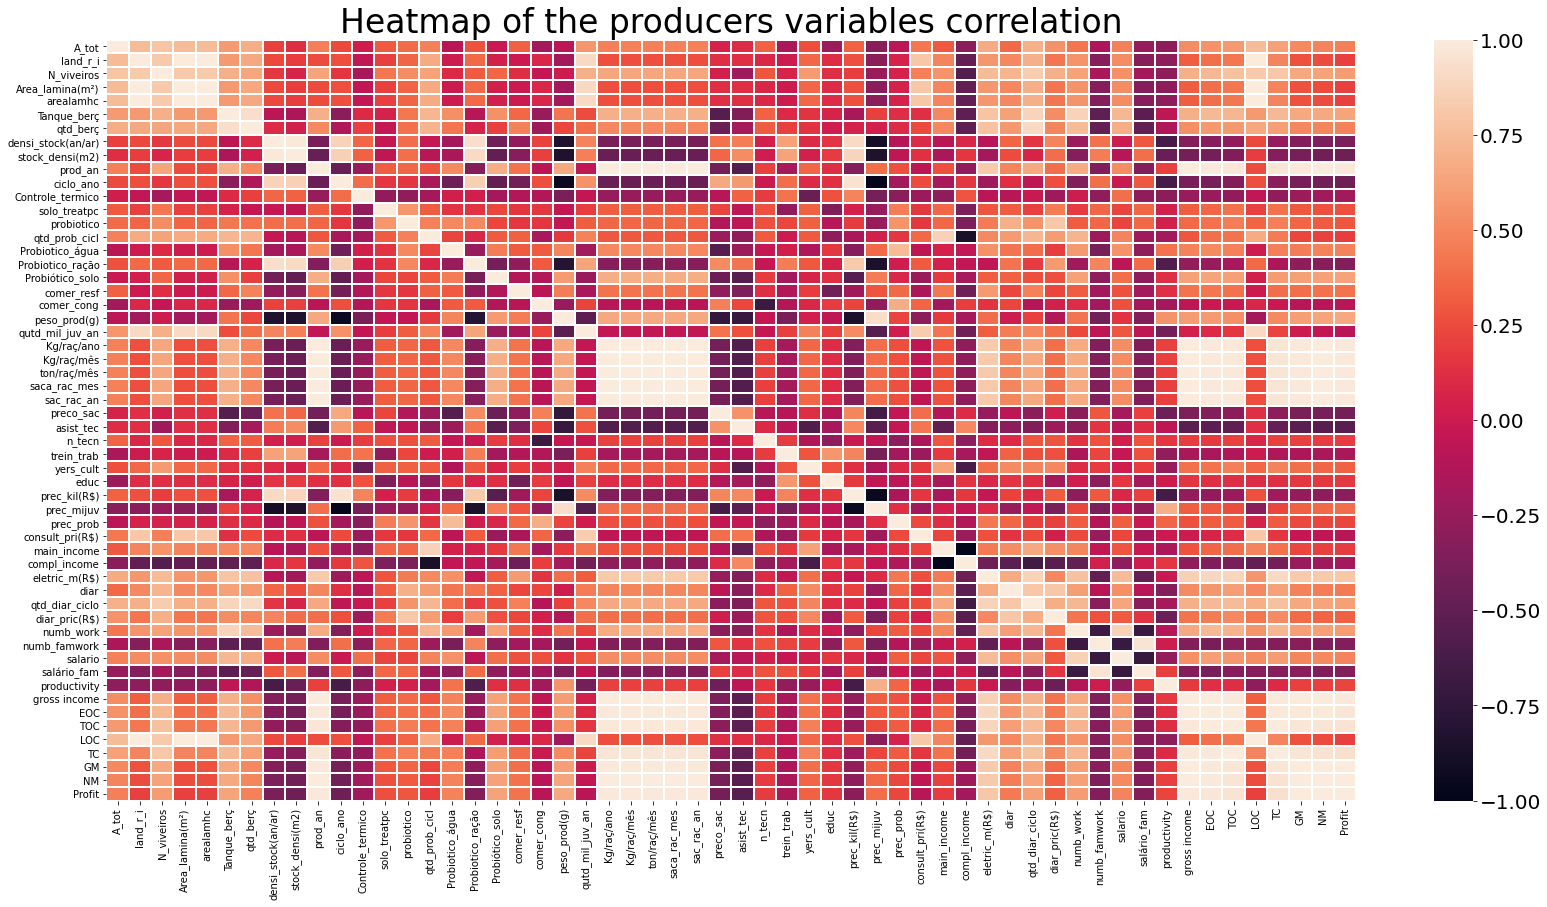

In [15]:
x=plt.figure(figsize=(28,14))
plt.title("Heatmap of the producers variables correlation", fontsize = 33)
plt.rcParams['font.size'] = '20'
plt.rcParams['xtick.labelsize'] = '20'
plt.rcParams['ytick.labelsize'] = '20'
df_corr=df2.corr()
sns.heatmap(df_corr,linewidths=1,linecolor='white')

## Making csv

In [16]:
#df.to_csv('feiranovamod.csv', sep = ';', encoding = 'utf-8')

## Exploring data

Text(0.5, 0, 'Cultured Species')

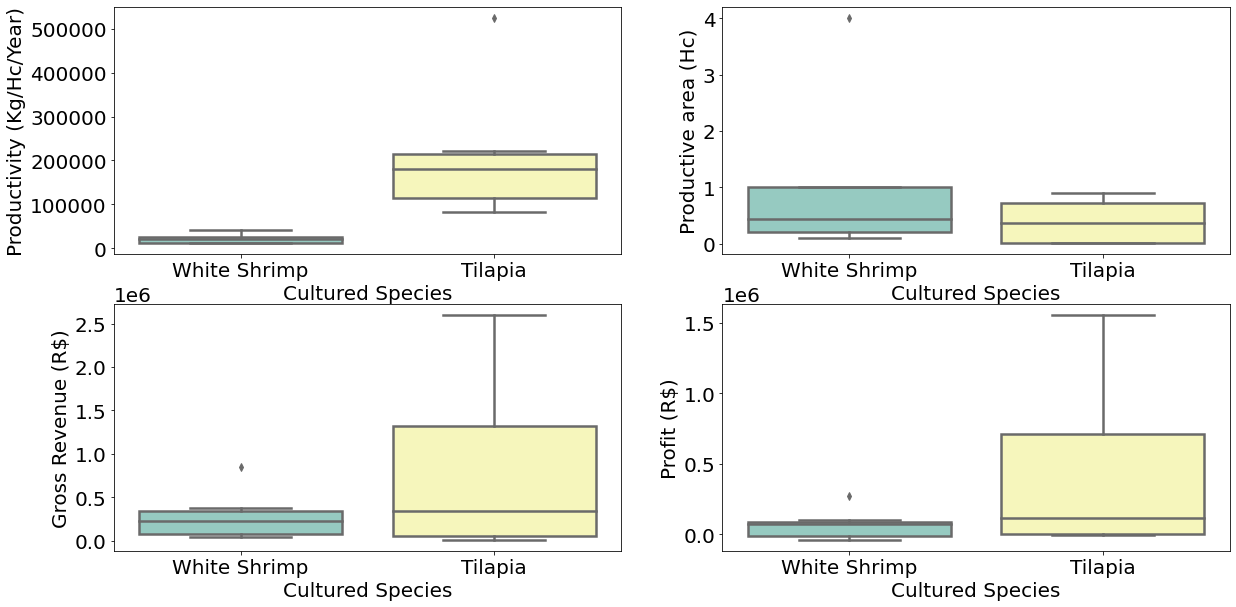

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.boxplot(x="esp_cult", y="productivity", data=df, linewidth=2.5,palette="Set3", ax=axes[0,0])
axes[0, 0].set_ylabel('Productivity (Kg/Hc/Year)', fontsize=20)
axes[0, 0].set_xlabel('Cultured Species', fontsize=20)


sns.boxplot(x="esp_cult", y="arealamhc", data=df, linewidth=2.5,palette="Set3", ax=axes[0,1])
axes[0, 1].set_ylabel('Productive area (Hc)', fontsize=20)
axes[0, 1].set_xlabel('Cultured Species', fontsize=20)

sns.boxplot(x="esp_cult", y="gross income", data=df, linewidth=2.5,palette="Set3", ax=axes[1,0])
axes[1, 0].set_ylabel('Gross Revenue (R$)', fontsize=20)
axes[1, 0].set_xlabel('Cultured Species', fontsize=20)

sns.boxplot(x="esp_cult", y="Profit", data=df, linewidth=2.5,palette="Set3", ax=axes[1,1])
axes[1, 1].set_ylabel('Profit (R$)', fontsize=20)
axes[1, 1].set_xlabel('Cultured Species', fontsize=20)
#plt.savefig('Prod_ec.jpg',dpi=400)

In [18]:
# Subseting to analise the variables per species
shrimp = df[df["esp_cult"] == "White Shrimp"]
tilapia = df[df["esp_cult"] == "Tilapia"]

## Checking if there are significant differences among the scores of the variables

In [28]:
stats.kruskal(shrimp['prod_an'], tilapia['prod_an'])


KruskalResult(statistic=0.5116096025186911, pvalue=0.47444290043705617)

In [29]:
stats.kruskal(shrimp['Area_lamina(m²)'], tilapia['Area_lamina(m²)'])


KruskalResult(statistic=1.6576151121605673, pvalue=0.1979256344845178)

In [30]:
stats.kruskal(shrimp['productivity'], tilapia['productivity'])


KruskalResult(statistic=9.0, pvalue=0.0026997960632601883)

In [31]:
stats.kruskal(shrimp['yers_cult'], tilapia['yers_cult'])


KruskalResult(statistic=0.04802955665024281, pvalue=0.826528166099895)

In [32]:
stats.kruskal(shrimp['numb_work'], tilapia['numb_work'])


KruskalResult(statistic=0.664835164835159, pvalue=0.41485812014624335)

In [33]:
stats.kruskal(shrimp['stock_densi(m2)'],tilapia['stock_densi(m2)'] )


KruskalResult(statistic=8.253968253968251, pvalue=0.00406630122199606)